In [14]:
import pandas as pd 
from sklearn import tree
fires = pd.read_csv("forestfires.csv", header=None, index_col=False) 
print(fires.head())

  0  1      2    3     4     5      6    7     8   9     10    11    12
0  X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
1  7  5    mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7     0     0
2  7  4    oct  tue  90.6  35.4  669.1  6.7    18  33   0.9     0     0
3  7  4    oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3     0     0
4  8  6    mar  fri  91.7  33.3   77.5    9   8.3  97     4   0.2     0


In [15]:
print(fires[2])

0      month
1        mar
2        oct
3        oct
4        mar
       ...  
513      aug
514      aug
515      aug
516      aug
517      nov
Name: 2, Length: 518, dtype: object


In [16]:
for index, value in enumerate(fires[2]):
    if (index > 0):
        # print(index, value)
        switcher={
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9,
            'oct': 10,
            'nov': 11,
            'dec': 12,
        }
        # print(switcher.get(value, "default"))
        fires[2][index] = switcher.get(value, 0)
# print(fires[2])

In [17]:
for index, value in enumerate(fires[3]):
    if (index > 0):
        switcher={
            'mon': 1,
            'tue': 2,
            'wed': 3,
            'thu': 4,
            'fri': 5,
            'sat': 6,
            'sun': 7,
        }
        fires[3][index] = switcher.get(value, 0)
# print(fires[3])

In [18]:
x = pd.DataFrame(fires.values[:,0:13], columns =['X','Y','month','day','FFMC','DMC','DC','ISI','temp', 'RH', 'wind', 'rain', 'area'])
y = pd.DataFrame(fires.values[:,8], columns =['TEMPERATURE'])

In [19]:
print(x.shape)
print(y.shape)

(518, 13)
(518, 1)


In [20]:
print(x[1:5])
print(y[1:5])

   X  Y month day  FFMC   DMC     DC  ISI  temp  RH wind rain area
1  7  5     3   5  86.2  26.2   94.3  5.1   8.2  51  6.7    0    0
2  7  4    10   2  90.6  35.4  669.1  6.7    18  33  0.9    0    0
3  7  4    10   6  90.6  43.7  686.9  6.7  14.6  33  1.3    0    0
4  8  6     3   5  91.7  33.3   77.5    9   8.3  97    4  0.2    0
  TEMPERATURE
1         8.2
2          18
3        14.6
4         8.3


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(51, 13)
(51, 1)
(467, 13)
(467, 1)


In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
#clf = clf.fit(x, y)

[Text(239.901384083045, 741.0126315789473, 'temp <= 11.25\ngini = 0.979\nsamples = 51\nvalue = [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1]'),
 Text(86.49965397923876, 700.957894736842, 'wind <= 5.35\ngini = 0.816\nsamples = 7\nvalue = [1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 1, 1]'),
 Text(64.87474048442907, 660.9031578947368, 'DC <= 28.45\ngini = 0.8\nsamples = 5\nvalue = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 1, 1]'),
 Text(43.24982698961938, 620.8484210526316, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 0, 0]'),
 Text(86.49965397923876, 620.8484210526

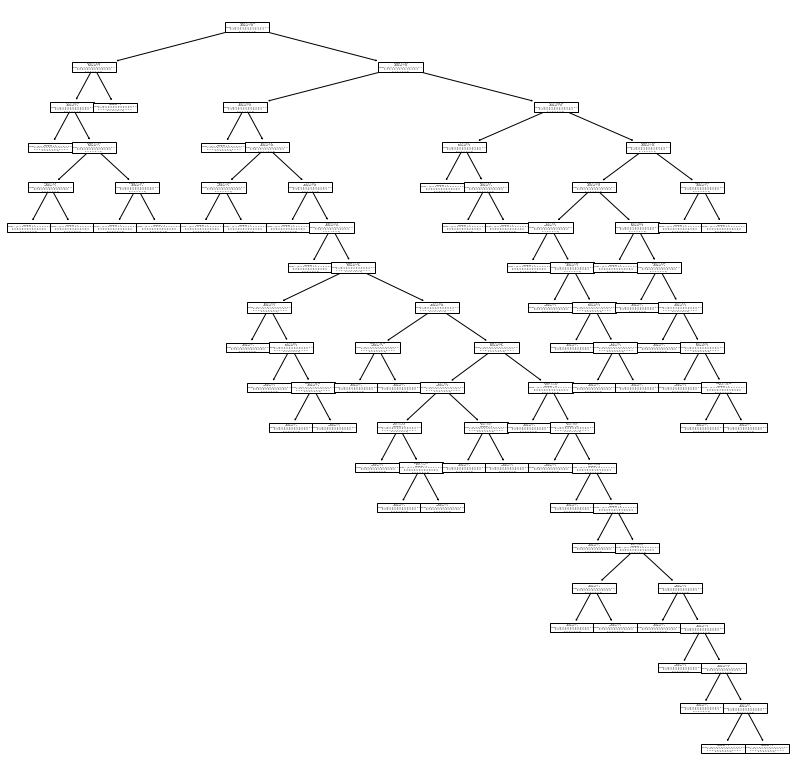

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf, feature_names=list(x.columns), class_names=)